In [1]:
import data
import torch
from torch.utils.data import TensorDataset
import numpy as np
from scipy.stats import entropy, ks_2samp, moment, wasserstein_distance, energy_distance
from scipy import stats

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import gans.w_gan as wgan
import gans.w_gp_gan as wgpgan
import gans.vae as vae
import gans.ns_gan as nsgan
import gans.mm_gan as mmgan
import gans.ls_gan as lsgan
import gans.dra_gan as dragan
import gans.be_gan as began
from gans.load_data import get_data
from gans.utils import to_var

In [2]:
def get_pdf(data):
    x = []
    for i in range(data.shape[0]):
        x.append(list(np.histogram(data[i], bins=100, density=True)[0]))
    df = pd.DataFrame(x)
    pdf = list(df.mean(axis=0))
    return pdf

def get_the_data(generator, samples, BATCH_SIZE = 100):
    data = torch.from_numpy(generator.generate_samples(samples)).float()
    labels = torch.from_numpy(np.zeros((samples,1)))
    data = TensorDataset(data, labels)
    data_iter = torch.utils.data.DataLoader(data, batch_size=BATCH_SIZE, shuffle=True)
    return data_iter
    
def preprocess(generator, samples, BATCH_SIZE = 100):
    train_iter = get_the_data(generator, samples, BATCH_SIZE)
    val_iter = get_the_data(generator, samples, BATCH_SIZE)
    test_iter = get_the_data(generator, samples, BATCH_SIZE)
    return train_iter, val_iter, test_iter

# Multivariate Distributions Example

In [ ]:
# generator = data.Distribution(distributions[i], 200)
# generator.save_dist('output_file.pickle')  # Saving the generator

# Mixture Models Example

In [ ]:
# generator = data.MixtureDistribution(distributions[i], distributions[j], n_mixtures=15, dim=200)
# generator.get_log_likelihood(data_train)
# generator.save_dist()

# Circles Example

In [ ]:
# generator = data.CirclesDatasetGenerator(size=256, n_circles=4, random_colors=True, random_sizes=True, modes=20)
# x = generator.generate_samples(10000)
# print(len(x))
# print(x[0].shape)
# generator.generate_samples_to_directory(5000, './dataset_1')
# generator.save_generator('./generator1.pickle')

# MNIST Data

In [ ]:
# train_iter, val_iter, test_iter = get_data()

In [ ]:
# train_iter.dataset.data_tensor.shape

# Preprocessing Synthetic Data

In [ ]:
# gen = data.Distribution(distributions[i], size) 

In [ ]:
# train_iter, val_iter, test_iter = preprocess(generator, 10000)

In [ ]:
# train_iter.dataset.data_tensor.shape

# Controlled Experiments on GANs

## 1. Divergence Measures between Distributions

#### Measuring divergence between Synthetic Data and GAN Data with the following metrics: KL Divergences, Jensen-Shannon Divergence, Optimal Tranport Distance, Wasserstein Distance, Energy Distance, Total Variation Distance


# KS Stat, KL Divergence, JS Divergence

In [3]:
size=200
distributions = ['normal', 'beta', 'exponential', 'gamma', 'gumbel', 'laplace']
pdfs = ['uniform', 'random']

In [4]:
# TODO: loop over mixture models and circles
gans = [wgan, wgpgan, nsgan, lsgan, mmgan, dragan, began, vae]
gans_index = ["wgan", "wgpgan", "nsgan", "lsgan", "mmgan", "dragan", "began", "vae"]
res = {}
for index, gan in enumerate(gans[:-1]):
    res[gans_index[index]] = {}
    print(gans_index[index])
    for dist in distributions[0:5]:
        res[gans_index[index]][dist]={}
        gen = data.Distribution(dist,size)
        train_iter, val_iter, test_iter = preprocess(gen, 10000)
        epochs = 50
        if gans_index[index]=="vae":
            model = vae.VAE(image_size = size, hidden_dim = 400, z_dim = 20)
            if torch.cuda.is_available():
                model.cuda()
            trainer = vae.Trainer(train_iter, val_iter, test_iter)
            model, kl, ks, js, wd, ed = trainer.train(model, num_epochs = epochs)
        else:
            model = gan.GAN(image_size = size, hidden_dim = 256, z_dim = int(round(size/4,0)))
            if torch.cuda.is_available():
                model = model.cuda()
            trainer = gan.Trainer(train_iter, val_iter, test_iter)
            model, kl, ks, js, wd, ed = trainer.train(model = model, num_epochs = epochs)
        res[gans_index[index]][dist]["KL-Divergence"] = kl
        res[gans_index[index]][dist]["KS-Stat"] = ks
        res[gans_index[index]][dist]["Jensen-Shannon"] = js
        res[gans_index[index]][dist]["Wasserstein-Distance"] = wd
        res[gans_index[index]][dist]["Energy-Distance"] = ed

wgan


A Jupyter Widget

Epoch[1/50], G Loss: -0.0020, D Loss: -0.2848
Epoch[2/50], G Loss: -0.0029, D Loss: -0.5658
Epoch[3/50], G Loss: -0.0069, D Loss: -0.7625
Epoch[4/50], G Loss: -0.0103, D Loss: -0.8732
Epoch[5/50], G Loss: -0.0120, D Loss: -0.8891
Epoch[6/50], G Loss: -0.0137, D Loss: -0.8879
Epoch[7/50], G Loss: -0.0136, D Loss: -0.8860
Epoch[8/50], G Loss: -0.0134, D Loss: -0.8778
Epoch[9/50], G Loss: -0.0137, D Loss: -0.8718
Epoch[10/50], G Loss: -0.0151, D Loss: -0.8800
Epoch[11/50], G Loss: -0.0156, D Loss: -0.8705
Epoch[12/50], G Loss: -0.0145, D Loss: -0.8678
Epoch[13/50], G Loss: -0.0133, D Loss: -0.8626
Epoch[14/50], G Loss: -0.0125, D Loss: -0.8538
Epoch[15/50], G Loss: -0.0123, D Loss: -0.8577
Epoch[16/50], G Loss: -0.0123, D Loss: -0.8538
Epoch[17/50], G Loss: -0.0133, D Loss: -0.8588
Epoch[18/50], G Loss: -0.0138, D Loss: -0.8446
Epoch[19/50], G Loss: -0.0151, D Loss: -0.8493
Epoch[20/50], G Loss: -0.0152, D Loss: -0.8272
Epoch[21/50], G Loss: -0.0134, D Loss: -0.8133
Epoch[22/50], G Loss: 

A Jupyter Widget

Epoch[1/50], G Loss: -0.0081, D Loss: -0.1211
Epoch[2/50], G Loss: -0.0506, D Loss: -0.2286
Epoch[3/50], G Loss: -0.1375, D Loss: -0.2561
Epoch[4/50], G Loss: -0.2279, D Loss: -0.2490
Epoch[5/50], G Loss: -0.2762, D Loss: -0.2173
Epoch[6/50], G Loss: -0.2837, D Loss: -0.1826
Epoch[7/50], G Loss: -0.2816, D Loss: -0.1542
Epoch[8/50], G Loss: -0.2613, D Loss: -0.1307
Epoch[9/50], G Loss: -0.2286, D Loss: -0.1139
Epoch[10/50], G Loss: -0.2287, D Loss: -0.1019
Epoch[11/50], G Loss: -0.2160, D Loss: -0.0887
Epoch[12/50], G Loss: -0.1672, D Loss: -0.0754
Epoch[13/50], G Loss: -0.1174, D Loss: -0.0636
Epoch[14/50], G Loss: -0.0968, D Loss: -0.0551
Epoch[15/50], G Loss: -0.0993, D Loss: -0.0475
Epoch[16/50], G Loss: -0.1075, D Loss: -0.0438
Epoch[17/50], G Loss: -0.1181, D Loss: -0.0387
Epoch[18/50], G Loss: -0.0884, D Loss: -0.0331
Epoch[19/50], G Loss: -0.0218, D Loss: -0.0291
Epoch[20/50], G Loss: -0.0124, D Loss: -0.0250
Epoch[21/50], G Loss: -0.0083, D Loss: -0.0211
Epoch[22/50], G Loss: 

A Jupyter Widget

Epoch[1/50], G Loss: -0.0064, D Loss: -0.1705
Epoch[2/50], G Loss: -0.0273, D Loss: -0.3129
Epoch[3/50], G Loss: -0.0566, D Loss: -0.3585
Epoch[4/50], G Loss: -0.1012, D Loss: -0.3464
Epoch[5/50], G Loss: -0.1500, D Loss: -0.2976
Epoch[6/50], G Loss: -0.2136, D Loss: -0.2551
Epoch[7/50], G Loss: -0.2722, D Loss: -0.2196
Epoch[8/50], G Loss: -0.3216, D Loss: -0.1908
Epoch[9/50], G Loss: -0.3519, D Loss: -0.1698
Epoch[10/50], G Loss: -0.3684, D Loss: -0.1507
Epoch[11/50], G Loss: -0.3791, D Loss: -0.1347
Epoch[12/50], G Loss: -0.3837, D Loss: -0.1189
Epoch[13/50], G Loss: -0.3758, D Loss: -0.1076
Epoch[14/50], G Loss: -0.3669, D Loss: -0.0933
Epoch[15/50], G Loss: -0.3419, D Loss: -0.0821
Epoch[16/50], G Loss: -0.3078, D Loss: -0.0732
Epoch[17/50], G Loss: -0.2799, D Loss: -0.0643
Epoch[18/50], G Loss: -0.2691, D Loss: -0.0582
Epoch[19/50], G Loss: -0.2673, D Loss: -0.0519
Epoch[20/50], G Loss: -0.2516, D Loss: -0.0469
Epoch[21/50], G Loss: -0.2278, D Loss: -0.0427
Epoch[22/50], G Loss: 

A Jupyter Widget

Epoch[1/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[2/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[3/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[4/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[5/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[6/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[7/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[8/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[9/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[10/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[11/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[12/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[13/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[14/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[15/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[16/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[17/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[18/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[19/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[20/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[21/50], G Loss: -0.0000, D Loss: 0.0000
Epoch[22/50], G Loss: -0.0000, D Loss: 0.00

A Jupyter Widget

Epoch[1/50], G Loss: -0.2490, D Loss: -0.2904
Epoch[2/50], G Loss: -0.5971, D Loss: -0.5458
Epoch[3/50], G Loss: -0.8634, D Loss: -0.6677
Epoch[4/50], G Loss: -1.0203, D Loss: -0.6886
Epoch[5/50], G Loss: -1.0759, D Loss: -0.6470
Epoch[6/50], G Loss: -1.1116, D Loss: -0.6075
Epoch[7/50], G Loss: -1.1360, D Loss: -0.5719
Epoch[8/50], G Loss: -1.1487, D Loss: -0.5439
Epoch[9/50], G Loss: -1.1422, D Loss: -0.5208
Epoch[10/50], G Loss: -1.1174, D Loss: -0.5010
Epoch[11/50], G Loss: -1.1029, D Loss: -0.4808
Epoch[12/50], G Loss: -1.1083, D Loss: -0.4600
Epoch[13/50], G Loss: -1.1104, D Loss: -0.4417
Epoch[14/50], G Loss: -1.1061, D Loss: -0.4278
Epoch[15/50], G Loss: -1.0993, D Loss: -0.4127
Epoch[16/50], G Loss: -1.0870, D Loss: -0.3986
Epoch[17/50], G Loss: -1.0656, D Loss: -0.3850
Epoch[18/50], G Loss: -1.0507, D Loss: -0.3754
Epoch[19/50], G Loss: -1.0438, D Loss: -0.3654
Epoch[20/50], G Loss: -1.0429, D Loss: -0.3544
Epoch[21/50], G Loss: -1.0319, D Loss: -0.3460
Epoch[22/50], G Loss: 

A Jupyter Widget

Epoch[1/50], G Loss: -0.0064, D Loss: 4.0460
Epoch[2/50], G Loss: -0.0238, D Loss: -0.5625
Epoch[3/50], G Loss: -0.0577, D Loss: -2.1843
Epoch[4/50], G Loss: -0.1004, D Loss: -3.6488
Epoch[5/50], G Loss: -0.1444, D Loss: -9.3386
Epoch[6/50], G Loss: -0.1664, D Loss: -12.6722
Epoch[7/50], G Loss: -0.2138, D Loss: -14.5161
Epoch[8/50], G Loss: -0.3003, D Loss: -14.8521
Epoch[9/50], G Loss: -0.3513, D Loss: -15.2462
Epoch[10/50], G Loss: -0.3997, D Loss: -14.8357
Epoch[11/50], G Loss: -0.4615, D Loss: -14.8993
Epoch[12/50], G Loss: -0.5750, D Loss: -14.9541
Epoch[13/50], G Loss: -0.6149, D Loss: -14.9158
Epoch[14/50], G Loss: -0.6449, D Loss: -14.8410
Epoch[15/50], G Loss: -0.7293, D Loss: -14.9843
Epoch[16/50], G Loss: -0.7649, D Loss: -14.7485
Epoch[17/50], G Loss: -0.7893, D Loss: -14.8524
Epoch[18/50], G Loss: -0.8482, D Loss: -15.1028
Epoch[19/50], G Loss: -0.8281, D Loss: -14.9814
Epoch[20/50], G Loss: -0.9118, D Loss: -15.1358
Epoch[21/50], G Loss: -0.9484, D Loss: -15.0589
Epoch[2

A Jupyter Widget

Epoch[1/50], G Loss: -0.0318, D Loss: 1.8642
Epoch[2/50], G Loss: -0.1803, D Loss: -1.8354
Epoch[3/50], G Loss: -0.4513, D Loss: -2.5910
Epoch[4/50], G Loss: -0.7499, D Loss: -2.5896
Epoch[5/50], G Loss: -0.9869, D Loss: -2.2735
Epoch[6/50], G Loss: -1.2524, D Loss: -1.9187
Epoch[7/50], G Loss: -1.4691, D Loss: -1.5912
Epoch[8/50], G Loss: -1.6302, D Loss: -1.3168
Epoch[9/50], G Loss: -1.8147, D Loss: -1.0912
Epoch[10/50], G Loss: -1.8753, D Loss: -0.9189
Epoch[11/50], G Loss: -1.8598, D Loss: -0.7875
Epoch[12/50], G Loss: -1.7547, D Loss: -0.6906
Epoch[13/50], G Loss: -1.6657, D Loss: -0.6291
Epoch[14/50], G Loss: -1.6193, D Loss: -0.5876
Epoch[15/50], G Loss: -1.4633, D Loss: -0.5772
Epoch[16/50], G Loss: -1.2027, D Loss: -0.5931
Epoch[17/50], G Loss: -1.0582, D Loss: -0.6197
Epoch[18/50], G Loss: -0.8676, D Loss: -0.6868
Epoch[19/50], G Loss: -0.4843, D Loss: -0.7448
Epoch[20/50], G Loss: -0.1206, D Loss: -0.7964
Epoch[21/50], G Loss: -0.1343, D Loss: -0.9334
Epoch[22/50], G Loss: -

A Jupyter Widget

Epoch[1/50], G Loss: -0.0348, D Loss: 2.1739
Epoch[2/50], G Loss: -0.1060, D Loss: -2.4962
Epoch[3/50], G Loss: -0.1928, D Loss: -3.4083
Epoch[4/50], G Loss: -0.3267, D Loss: -3.3996
Epoch[5/50], G Loss: -0.6083, D Loss: -3.0809
Epoch[6/50], G Loss: -1.0127, D Loss: -2.7522
Epoch[7/50], G Loss: -1.4507, D Loss: -2.4756
Epoch[8/50], G Loss: -1.8781, D Loss: -2.2775
Epoch[9/50], G Loss: -2.1720, D Loss: -2.1280
Epoch[10/50], G Loss: -2.3733, D Loss: -2.0673
Epoch[11/50], G Loss: -2.5061, D Loss: -2.0545
Epoch[12/50], G Loss: -2.4912, D Loss: -2.1097
Epoch[13/50], G Loss: -2.3403, D Loss: -2.2008
Epoch[14/50], G Loss: -2.0949, D Loss: -2.3658
Epoch[15/50], G Loss: -1.9614, D Loss: -2.5845
Epoch[16/50], G Loss: -1.8729, D Loss: -2.8334
Epoch[17/50], G Loss: -1.7044, D Loss: -3.0867
Epoch[18/50], G Loss: -1.4185, D Loss: -3.3987
Epoch[19/50], G Loss: -1.1311, D Loss: -3.6768
Epoch[20/50], G Loss: -0.8860, D Loss: -3.9538
Epoch[21/50], G Loss: -0.7117, D Loss: -4.1466
Epoch[22/50], G Loss: -

A Jupyter Widget

Epoch[1/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[2/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[3/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[4/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[5/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[6/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[7/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[8/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[9/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[10/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[11/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[12/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[13/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[14/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[15/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[16/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[17/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[18/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[19/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[20/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[21/50], G Loss: -0.0000, D Loss: 10.0000
Epoch[22/50], G Loss: 

A Jupyter Widget

Epoch[1/50], G Loss: -0.5414, D Loss: 1.9029
Epoch[2/50], G Loss: -2.4270, D Loss: -3.3588
Epoch[3/50], G Loss: -4.4038, D Loss: -4.9532
Epoch[4/50], G Loss: -5.5524, D Loss: -5.1514
Epoch[5/50], G Loss: -6.1149, D Loss: -4.8659
Epoch[6/50], G Loss: -6.4362, D Loss: -4.4647
Epoch[7/50], G Loss: -6.6249, D Loss: -4.1237
Epoch[8/50], G Loss: -6.7471, D Loss: -3.8495
Epoch[9/50], G Loss: -6.8416, D Loss: -3.6256
Epoch[10/50], G Loss: -6.8184, D Loss: -3.4673
Epoch[11/50], G Loss: -6.7645, D Loss: -3.3226
Epoch[12/50], G Loss: -6.6412, D Loss: -3.2244
Epoch[13/50], G Loss: -6.4562, D Loss: -3.1901
Epoch[14/50], G Loss: -6.3560, D Loss: -3.1838
Epoch[15/50], G Loss: -6.1554, D Loss: -3.1940
Epoch[16/50], G Loss: -5.9816, D Loss: -3.2250
Epoch[17/50], G Loss: -5.8566, D Loss: -3.2893
Epoch[18/50], G Loss: -5.7292, D Loss: -3.3608
Epoch[19/50], G Loss: -5.5883, D Loss: -3.4411
Epoch[20/50], G Loss: -5.3785, D Loss: -3.4972
Epoch[21/50], G Loss: -5.2615, D Loss: -3.6236
Epoch[22/50], G Loss: -

A Jupyter Widget

Epoch[1/50], G Loss: 1.2175, D Loss: 0.6871
Epoch[2/50], G Loss: 1.3846, D Loss: 0.5159
Epoch[3/50], G Loss: 1.4152, D Loss: 0.4585
Epoch[4/50], G Loss: 1.3299, D Loss: 0.5235
Epoch[5/50], G Loss: 1.3644, D Loss: 0.5268
Epoch[6/50], G Loss: 1.4381, D Loss: 0.4955
Epoch[7/50], G Loss: 1.5438, D Loss: 0.5158
Epoch[8/50], G Loss: 1.9268, D Loss: 0.3863
Epoch[9/50], G Loss: 1.8970, D Loss: 0.3961
Epoch[10/50], G Loss: 1.9233, D Loss: 0.4226
Epoch[11/50], G Loss: 2.0433, D Loss: 0.3920
Epoch[12/50], G Loss: 2.2088, D Loss: 0.3824
Epoch[13/50], G Loss: 2.4065, D Loss: 0.2943
Epoch[14/50], G Loss: 2.2203, D Loss: 0.3815
Epoch[15/50], G Loss: 2.3387, D Loss: 0.3237
Epoch[16/50], G Loss: 2.4152, D Loss: 0.3060
Epoch[17/50], G Loss: 2.3063, D Loss: 0.3790
Epoch[18/50], G Loss: 2.5371, D Loss: 0.2791
Epoch[19/50], G Loss: 2.5358, D Loss: 0.2686
Epoch[20/50], G Loss: 2.3524, D Loss: 0.3510
Epoch[21/50], G Loss: 2.6544, D Loss: 0.2423
Epoch[22/50], G Loss: 2.6857, D Loss: 0.2409
Epoch[23/50], G Los

A Jupyter Widget

Epoch[1/50], G Loss: 0.8931, D Loss: 1.0272
Epoch[2/50], G Loss: 0.7461, D Loss: 1.2361
Epoch[3/50], G Loss: 0.7867, D Loss: 1.1768
Epoch[4/50], G Loss: 0.8776, D Loss: 1.0599
Epoch[5/50], G Loss: 0.8146, D Loss: 1.1865
Epoch[6/50], G Loss: 0.8642, D Loss: 1.1673
Epoch[7/50], G Loss: 0.8277, D Loss: 1.2714
Epoch[8/50], G Loss: 0.8431, D Loss: 1.2541
Epoch[9/50], G Loss: 0.8528, D Loss: 1.2849
Epoch[10/50], G Loss: 1.0414, D Loss: 0.9900
Epoch[11/50], G Loss: 1.0005, D Loss: 1.0730
Epoch[12/50], G Loss: 0.8618, D Loss: 1.3204
Epoch[13/50], G Loss: 1.0183, D Loss: 1.0512
Epoch[14/50], G Loss: 0.7960, D Loss: 1.4599
Epoch[15/50], G Loss: 0.9840, D Loss: 1.1677
Epoch[16/50], G Loss: 1.4054, D Loss: 0.6496
Epoch[17/50], G Loss: 1.0527, D Loss: 1.0302
Epoch[18/50], G Loss: 0.9833, D Loss: 1.1092
Epoch[19/50], G Loss: 1.0879, D Loss: 0.9816
Epoch[20/50], G Loss: 0.9387, D Loss: 1.1631
Epoch[21/50], G Loss: 0.9621, D Loss: 1.0579
Epoch[22/50], G Loss: 0.7927, D Loss: 1.3619
Epoch[23/50], G Los

A Jupyter Widget

Epoch[1/50], G Loss: 0.9812, D Loss: 0.9033
Epoch[2/50], G Loss: 0.9119, D Loss: 0.9700
Epoch[3/50], G Loss: 1.0235, D Loss: 0.8480
Epoch[4/50], G Loss: 1.1957, D Loss: 0.6973
Epoch[5/50], G Loss: 1.2642, D Loss: 0.6510
Epoch[6/50], G Loss: 1.3655, D Loss: 0.5924
Epoch[7/50], G Loss: 1.3710, D Loss: 0.5749
Epoch[8/50], G Loss: 1.3414, D Loss: 0.5981
Epoch[9/50], G Loss: 1.3734, D Loss: 0.5826
Epoch[10/50], G Loss: 1.5684, D Loss: 0.4702
Epoch[11/50], G Loss: 1.7176, D Loss: 0.4082
Epoch[12/50], G Loss: 2.0591, D Loss: 0.2871
Epoch[13/50], G Loss: 2.0833, D Loss: 0.2985
Epoch[14/50], G Loss: 2.0928, D Loss: 0.2904
Epoch[15/50], G Loss: 2.3104, D Loss: 0.2346
Epoch[16/50], G Loss: 2.4590, D Loss: 0.2051
Epoch[17/50], G Loss: 2.5090, D Loss: 0.1988
Epoch[18/50], G Loss: 2.5277, D Loss: 0.1938
Epoch[19/50], G Loss: 2.6510, D Loss: 0.1739
Epoch[20/50], G Loss: 2.7395, D Loss: 0.1683
Epoch[21/50], G Loss: 2.8066, D Loss: 0.1684
Epoch[22/50], G Loss: 2.8020, D Loss: 0.1709
Epoch[23/50], G Los

A Jupyter Widget

Epoch[1/50], G Loss: 2.2970, D Loss: 27.7785
Epoch[2/50], G Loss: 2.0947, D Loss: 27.7821
Epoch[3/50], G Loss: 1.6079, D Loss: 27.8662
Epoch[4/50], G Loss: 1.7685, D Loss: 27.8235
Epoch[5/50], G Loss: 2.1389, D Loss: 27.7594
Epoch[6/50], G Loss: 2.5536, D Loss: 27.7133
Epoch[7/50], G Loss: 2.9506, D Loss: 27.6854
Epoch[8/50], G Loss: 3.3073, D Loss: 27.6687
Epoch[9/50], G Loss: 3.6242, D Loss: 27.6583
Epoch[10/50], G Loss: 3.9067, D Loss: 27.6515
Epoch[11/50], G Loss: 4.1611, D Loss: 27.6468
Epoch[12/50], G Loss: 4.3913, D Loss: 27.6436
Epoch[13/50], G Loss: 4.6016, D Loss: 27.6412
Epoch[14/50], G Loss: 4.7955, D Loss: 27.6394
Epoch[15/50], G Loss: 4.9757, D Loss: 27.6380
Epoch[16/50], G Loss: 5.1436, D Loss: 27.6369
Epoch[17/50], G Loss: 5.3017, D Loss: 27.6360
Epoch[18/50], G Loss: 5.4512, D Loss: 27.6353
Epoch[19/50], G Loss: 5.5927, D Loss: 27.6348
Epoch[20/50], G Loss: 5.7273, D Loss: 27.6343
Epoch[21/50], G Loss: 5.8561, D Loss: 27.6339
Epoch[22/50], G Loss: 5.9795, D Loss: 27.63

A Jupyter Widget

Epoch[1/50], G Loss: 0.7827, D Loss: 0.9857
Epoch[2/50], G Loss: 0.7689, D Loss: 0.9688
Epoch[3/50], G Loss: 0.9215, D Loss: 0.8024
Epoch[4/50], G Loss: 1.0456, D Loss: 0.6932
Epoch[5/50], G Loss: 1.1541, D Loss: 0.6231
Epoch[6/50], G Loss: 1.2657, D Loss: 0.5565
Epoch[7/50], G Loss: 1.3569, D Loss: 0.5042
Epoch[8/50], G Loss: 1.3604, D Loss: 0.5221
Epoch[9/50], G Loss: 1.4115, D Loss: 0.4942
Epoch[10/50], G Loss: 1.7694, D Loss: 0.3343
Epoch[11/50], G Loss: 1.9870, D Loss: 0.2704
Epoch[12/50], G Loss: 2.2751, D Loss: 0.2071
Epoch[13/50], G Loss: 2.3080, D Loss: 0.2064
Epoch[14/50], G Loss: 2.3847, D Loss: 0.1930
Epoch[15/50], G Loss: 2.5636, D Loss: 0.1552
Epoch[16/50], G Loss: 2.6860, D Loss: 0.1383
Epoch[17/50], G Loss: 2.8971, D Loss: 0.1134
Epoch[18/50], G Loss: 3.0987, D Loss: 0.0954
Epoch[19/50], G Loss: 3.0527, D Loss: 0.1002
Epoch[20/50], G Loss: 3.0535, D Loss: 0.0971
Epoch[21/50], G Loss: 3.1400, D Loss: 0.0886
Epoch[22/50], G Loss: 3.3046, D Loss: 0.0760
Epoch[23/50], G Los

A Jupyter Widget

Epoch[1/50], G Loss: 0.2077, D Loss: 0.1271
Epoch[2/50], G Loss: 0.2632, D Loss: 0.0732
Epoch[3/50], G Loss: 0.2619, D Loss: 0.0735
Epoch[4/50], G Loss: 0.2642, D Loss: 0.0683
Epoch[5/50], G Loss: 0.2578, D Loss: 0.0694
Epoch[6/50], G Loss: 0.2516, D Loss: 0.0687
Epoch[7/50], G Loss: 0.2481, D Loss: 0.0690
Epoch[8/50], G Loss: 0.2646, D Loss: 0.0581
Epoch[9/50], G Loss: 0.2720, D Loss: 0.0555
Epoch[10/50], G Loss: 0.2841, D Loss: 0.0539
Epoch[11/50], G Loss: 0.2958, D Loss: 0.0526
Epoch[12/50], G Loss: 0.3095, D Loss: 0.0477
Epoch[13/50], G Loss: 0.3291, D Loss: 0.0419
Epoch[14/50], G Loss: 0.3366, D Loss: 0.0432
Epoch[15/50], G Loss: 0.3445, D Loss: 0.0393
Epoch[16/50], G Loss: 0.3450, D Loss: 0.0384
Epoch[17/50], G Loss: 0.3506, D Loss: 0.0361
Epoch[18/50], G Loss: 0.3665, D Loss: 0.0288
Epoch[19/50], G Loss: 0.3659, D Loss: 0.0287
Epoch[20/50], G Loss: 0.3744, D Loss: 0.0258
Epoch[21/50], G Loss: 0.3784, D Loss: 0.0238
Epoch[22/50], G Loss: 0.3839, D Loss: 0.0217
Epoch[23/50], G Los

A Jupyter Widget

Epoch[1/50], G Loss: 0.1619, D Loss: 0.1865
Epoch[2/50], G Loss: 0.1507, D Loss: 0.1941
Epoch[3/50], G Loss: 0.1353, D Loss: 0.2125
Epoch[4/50], G Loss: 0.1388, D Loss: 0.2081
Epoch[5/50], G Loss: 0.1471, D Loss: 0.1995
Epoch[6/50], G Loss: 0.1548, D Loss: 0.1868
Epoch[7/50], G Loss: 0.1627, D Loss: 0.1801
Epoch[8/50], G Loss: 0.1623, D Loss: 0.1829
Epoch[9/50], G Loss: 0.1658, D Loss: 0.1744
Epoch[10/50], G Loss: 0.1694, D Loss: 0.1708
Epoch[11/50], G Loss: 0.1667, D Loss: 0.1756
Epoch[12/50], G Loss: 0.1658, D Loss: 0.1795
Epoch[13/50], G Loss: 0.1611, D Loss: 0.1875
Epoch[14/50], G Loss: 0.1656, D Loss: 0.1826
Epoch[15/50], G Loss: 0.1694, D Loss: 0.1788
Epoch[16/50], G Loss: 0.1794, D Loss: 0.1660
Epoch[17/50], G Loss: 0.1764, D Loss: 0.1692
Epoch[18/50], G Loss: 0.1898, D Loss: 0.1524
Epoch[19/50], G Loss: 0.1870, D Loss: 0.1563
Epoch[20/50], G Loss: 0.1940, D Loss: 0.1465
Epoch[21/50], G Loss: 0.1913, D Loss: 0.1515
Epoch[22/50], G Loss: 0.1954, D Loss: 0.1442
Epoch[23/50], G Los

A Jupyter Widget

Epoch[1/50], G Loss: 0.1694, D Loss: 0.1610
Epoch[2/50], G Loss: 0.2050, D Loss: 0.1207
Epoch[3/50], G Loss: 0.1837, D Loss: 0.1461
Epoch[4/50], G Loss: 0.1871, D Loss: 0.1387
Epoch[5/50], G Loss: 0.2012, D Loss: 0.1231
Epoch[6/50], G Loss: 0.2114, D Loss: 0.1112
Epoch[7/50], G Loss: 0.2246, D Loss: 0.0962
Epoch[8/50], G Loss: 0.2321, D Loss: 0.0892
Epoch[9/50], G Loss: 0.2394, D Loss: 0.0819
Epoch[10/50], G Loss: 0.2473, D Loss: 0.0742
Epoch[11/50], G Loss: 0.2519, D Loss: 0.0707
Epoch[12/50], G Loss: 0.2578, D Loss: 0.0671
Epoch[13/50], G Loss: 0.2699, D Loss: 0.0619
Epoch[14/50], G Loss: 0.2791, D Loss: 0.0582
Epoch[15/50], G Loss: 0.2988, D Loss: 0.0470
Epoch[16/50], G Loss: 0.3140, D Loss: 0.0397
Epoch[17/50], G Loss: 0.3162, D Loss: 0.0404
Epoch[18/50], G Loss: 0.3197, D Loss: 0.0395
Epoch[19/50], G Loss: 0.3431, D Loss: 0.0298
Epoch[20/50], G Loss: 0.3404, D Loss: 0.0319
Epoch[21/50], G Loss: 0.3527, D Loss: 0.0269
Epoch[22/50], G Loss: 0.3447, D Loss: 0.0308
Epoch[23/50], G Los

A Jupyter Widget

Epoch[1/50], G Loss: 0.1742, D Loss: 0.0871
Epoch[2/50], G Loss: 0.1943, D Loss: 0.0722
Epoch[3/50], G Loss: 0.1593, D Loss: 0.0971
Epoch[4/50], G Loss: 0.1464, D Loss: 0.1063
Epoch[5/50], G Loss: 0.1475, D Loss: 0.1053
Epoch[6/50], G Loss: 0.1377, D Loss: 0.1139
Epoch[7/50], G Loss: 0.1653, D Loss: 0.0910
Epoch[8/50], G Loss: 0.1627, D Loss: 0.0930
Epoch[9/50], G Loss: 0.1859, D Loss: 0.0771
Epoch[10/50], G Loss: 0.1827, D Loss: 0.0795
Epoch[11/50], G Loss: 0.2009, D Loss: 0.0684
Epoch[12/50], G Loss: 0.2198, D Loss: 0.0571
Epoch[13/50], G Loss: 0.2334, D Loss: 0.0506
Epoch[14/50], G Loss: 0.2358, D Loss: 0.0495
Epoch[15/50], G Loss: 0.2587, D Loss: 0.0400
Epoch[16/50], G Loss: 0.2849, D Loss: 0.0304
Epoch[17/50], G Loss: 0.2978, D Loss: 0.0263
Epoch[18/50], G Loss: 0.3069, D Loss: 0.0237
Epoch[19/50], G Loss: 0.3156, D Loss: 0.0213
Epoch[20/50], G Loss: 0.3279, D Loss: 0.0182
Epoch[21/50], G Loss: 0.3149, D Loss: 0.0216
Epoch[22/50], G Loss: 0.3370, D Loss: 0.0162
Epoch[23/50], G Los

A Jupyter Widget

Epoch[1/50], G Loss: 0.1568, D Loss: 0.1569
Epoch[2/50], G Loss: 0.1646, D Loss: 0.1427
Epoch[3/50], G Loss: 0.1489, D Loss: 0.1531
Epoch[4/50], G Loss: 0.1765, D Loss: 0.1229
Epoch[5/50], G Loss: 0.1891, D Loss: 0.1115
Epoch[6/50], G Loss: 0.2105, D Loss: 0.0934
Epoch[7/50], G Loss: 0.2232, D Loss: 0.0834
Epoch[8/50], G Loss: 0.2382, D Loss: 0.0731
Epoch[9/50], G Loss: 0.2435, D Loss: 0.0686
Epoch[10/50], G Loss: 0.2602, D Loss: 0.0580
Epoch[11/50], G Loss: 0.2717, D Loss: 0.0528
Epoch[12/50], G Loss: 0.2839, D Loss: 0.0466
Epoch[13/50], G Loss: 0.2992, D Loss: 0.0405
Epoch[14/50], G Loss: 0.3133, D Loss: 0.0347
Epoch[15/50], G Loss: 0.3261, D Loss: 0.0304
Epoch[16/50], G Loss: 0.3368, D Loss: 0.0271
Epoch[17/50], G Loss: 0.3507, D Loss: 0.0226
Epoch[18/50], G Loss: 0.3557, D Loss: 0.0214
Epoch[19/50], G Loss: 0.3663, D Loss: 0.0179
Epoch[20/50], G Loss: 0.3688, D Loss: 0.0176
Epoch[21/50], G Loss: 0.3791, D Loss: 0.0151
Epoch[22/50], G Loss: 0.3823, D Loss: 0.0144
Epoch[23/50], G Los

/Users/heart/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1189: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


A Jupyter Widget

Epoch[1/50], G Loss: -0.3851, D Loss: 0.7102
Epoch[2/50], G Loss: -0.2798, D Loss: 0.5003
Epoch[3/50], G Loss: -0.2842, D Loss: 0.4515
Epoch[4/50], G Loss: -0.2978, D Loss: 0.4979
Epoch[5/50], G Loss: -0.3276, D Loss: 0.5583
Epoch[6/50], G Loss: -0.2600, D Loss: 0.4622
Epoch[7/50], G Loss: -0.1702, D Loss: 0.3364
Epoch[8/50], G Loss: -0.1673, D Loss: 0.3780
Epoch[9/50], G Loss: -0.1216, D Loss: 0.2606
Epoch[10/50], G Loss: -0.1833, D Loss: 0.4259
Epoch[11/50], G Loss: -0.1330, D Loss: 0.2951
Epoch[12/50], G Loss: -0.0544, D Loss: 0.1105
Epoch[13/50], G Loss: -0.1098, D Loss: 0.2105
Epoch[14/50], G Loss: -0.1546, D Loss: 0.3389
Epoch[15/50], G Loss: -0.1761, D Loss: 0.3887
Epoch[16/50], G Loss: -0.1172, D Loss: 0.2454
Epoch[17/50], G Loss: -0.1119, D Loss: 0.2449
Epoch[18/50], G Loss: -0.1191, D Loss: 0.2767
Epoch[19/50], G Loss: -0.1069, D Loss: 0.2469
Epoch[20/50], G Loss: -0.0925, D Loss: 0.2083
Epoch[21/50], G Loss: -0.0628, D Loss: 0.1405
Epoch[22/50], G Loss: -0.0574, D Loss: 0.12

A Jupyter Widget

Epoch[1/50], G Loss: -0.5324, D Loss: 1.0336
Epoch[2/50], G Loss: -0.6792, D Loss: 1.2819
Epoch[3/50], G Loss: -0.5681, D Loss: 1.0924
Epoch[4/50], G Loss: -0.5726, D Loss: 1.1367
Epoch[5/50], G Loss: -0.5099, D Loss: 1.0085
Epoch[6/50], G Loss: -0.6618, D Loss: 1.3979
Epoch[7/50], G Loss: -0.3191, D Loss: 0.6817
Epoch[8/50], G Loss: -1.0195, D Loss: 2.0829
Epoch[9/50], G Loss: -0.2728, D Loss: 0.5560
Epoch[10/50], G Loss: -0.3317, D Loss: 0.6208
Epoch[11/50], G Loss: -0.8851, D Loss: 1.5051
Epoch[12/50], G Loss: -0.9260, D Loss: 1.6768
Epoch[13/50], G Loss: -0.7449, D Loss: 1.3668
Epoch[14/50], G Loss: -0.2764, D Loss: 0.5502
Epoch[15/50], G Loss: -0.5368, D Loss: 1.0323
Epoch[16/50], G Loss: -0.6859, D Loss: 1.3739
Epoch[17/50], G Loss: -0.4298, D Loss: 0.8870
Epoch[18/50], G Loss: -0.5096, D Loss: 1.0726
Epoch[19/50], G Loss: -0.4643, D Loss: 0.9604
Epoch[20/50], G Loss: -0.6123, D Loss: 1.3044
Epoch[21/50], G Loss: -0.4978, D Loss: 1.0688
Epoch[22/50], G Loss: -0.6656, D Loss: 1.45

A Jupyter Widget

Epoch[1/50], G Loss: -0.4736, D Loss: 0.9333
Epoch[2/50], G Loss: -0.5518, D Loss: 1.0538
Epoch[3/50], G Loss: -0.4838, D Loss: 0.9377
Epoch[4/50], G Loss: -0.3867, D Loss: 0.7664
Epoch[5/50], G Loss: -0.3438, D Loss: 0.6581
Epoch[6/50], G Loss: -0.3374, D Loss: 0.6663
Epoch[7/50], G Loss: -0.3286, D Loss: 0.6307
Epoch[8/50], G Loss: -0.3831, D Loss: 0.7214
Epoch[9/50], G Loss: -0.3769, D Loss: 0.7050
Epoch[10/50], G Loss: -0.2624, D Loss: 0.4859
Epoch[11/50], G Loss: -0.2296, D Loss: 0.4344
Epoch[12/50], G Loss: -0.1679, D Loss: 0.3203
Epoch[13/50], G Loss: -0.1644, D Loss: 0.3190
Epoch[14/50], G Loss: -0.1445, D Loss: 0.2764
Epoch[15/50], G Loss: -0.1279, D Loss: 0.2403
Epoch[16/50], G Loss: -0.1211, D Loss: 0.2288
Epoch[17/50], G Loss: -0.0946, D Loss: 0.1774
Epoch[18/50], G Loss: -0.0728, D Loss: 0.1389
Epoch[19/50], G Loss: -0.0789, D Loss: 0.1539
Epoch[20/50], G Loss: -0.0740, D Loss: 0.1443
Epoch[21/50], G Loss: -0.0807, D Loss: 0.1625
Epoch[22/50], G Loss: -0.0599, D Loss: 0.11

A Jupyter Widget

Epoch[1/50], G Loss: -0.5029, D Loss: 0.5126
Epoch[2/50], G Loss: -0.5611, D Loss: 0.5643
Epoch[3/50], G Loss: -0.5679, D Loss: 0.5701
Epoch[4/50], G Loss: -0.5522, D Loss: 0.5551
Epoch[5/50], G Loss: -0.6592, D Loss: 0.6635
Epoch[6/50], G Loss: -0.7362, D Loss: 0.7423
Epoch[7/50], G Loss: -0.3787, D Loss: 0.3835
Epoch[8/50], G Loss: -0.2902, D Loss: 0.2917
Epoch[9/50], G Loss: -0.2854, D Loss: 0.2875
Epoch[10/50], G Loss: -0.2367, D Loss: 0.2382
Epoch[11/50], G Loss: -0.2043, D Loss: 0.2058
Epoch[12/50], G Loss: -0.2632, D Loss: 0.2653
Epoch[13/50], G Loss: -0.1412, D Loss: 0.1424
Epoch[14/50], G Loss: -0.1198, D Loss: 0.1208
Epoch[15/50], G Loss: -0.1195, D Loss: 0.1203
Epoch[16/50], G Loss: -0.0939, D Loss: 0.0948
Epoch[17/50], G Loss: -0.0666, D Loss: 0.0671
Epoch[18/50], G Loss: -0.0590, D Loss: 0.0594
Epoch[19/50], G Loss: -0.0531, D Loss: 0.0534
Epoch[20/50], G Loss: -0.0484, D Loss: 0.0488
Epoch[21/50], G Loss: -0.0373, D Loss: 0.0375
Epoch[22/50], G Loss: -0.0335, D Loss: 0.03

A Jupyter Widget

Epoch[1/50], G Loss: -0.6382, D Loss: 1.0290
Epoch[2/50], G Loss: -0.6354, D Loss: 0.9985
Epoch[3/50], G Loss: -0.5018, D Loss: 0.8057
Epoch[4/50], G Loss: -0.4690, D Loss: 0.7605
Epoch[5/50], G Loss: -0.3538, D Loss: 0.5734
Epoch[6/50], G Loss: -0.3789, D Loss: 0.6260
Epoch[7/50], G Loss: -0.3241, D Loss: 0.5403
Epoch[8/50], G Loss: -0.3048, D Loss: 0.4929
Epoch[9/50], G Loss: -0.2551, D Loss: 0.4302
Epoch[10/50], G Loss: -0.2081, D Loss: 0.3486
Epoch[11/50], G Loss: -0.1587, D Loss: 0.2670
Epoch[12/50], G Loss: -0.1541, D Loss: 0.2617
Epoch[13/50], G Loss: -0.1157, D Loss: 0.1953
Epoch[14/50], G Loss: -0.0974, D Loss: 0.1662
Epoch[15/50], G Loss: -0.0728, D Loss: 0.1247
Epoch[16/50], G Loss: -0.0664, D Loss: 0.1146
Epoch[17/50], G Loss: -0.0594, D Loss: 0.1043
Epoch[18/50], G Loss: -0.0524, D Loss: 0.0915
Epoch[19/50], G Loss: -0.0541, D Loss: 0.0954
Epoch[20/50], G Loss: -0.0365, D Loss: 0.0637
Epoch[21/50], G Loss: -0.0269, D Loss: 0.0469
Epoch[22/50], G Loss: -0.0243, D Loss: 0.04

A Jupyter Widget

Epoch[1/50], G Loss: 0.8035, D Loss: 9.1825
Epoch[2/50], G Loss: 0.5636, D Loss: 8.4223
Epoch[3/50], G Loss: 0.5591, D Loss: 8.6843
Epoch[4/50], G Loss: 0.6179, D Loss: 8.9753
Epoch[5/50], G Loss: 0.6981, D Loss: 9.1445
Epoch[6/50], G Loss: 0.7320, D Loss: 9.1639
Epoch[7/50], G Loss: 0.7400, D Loss: 9.2222
Epoch[8/50], G Loss: 0.7457, D Loss: 9.4141
Epoch[9/50], G Loss: 0.7452, D Loss: 9.6350
Epoch[10/50], G Loss: 0.7487, D Loss: 9.7189
Epoch[11/50], G Loss: 0.7614, D Loss: 9.6176
Epoch[12/50], G Loss: 0.7685, D Loss: 9.5827
Epoch[13/50], G Loss: 0.7714, D Loss: 9.7085
Epoch[14/50], G Loss: 0.7779, D Loss: 9.6824
Epoch[15/50], G Loss: 0.7839, D Loss: 9.6761
Epoch[16/50], G Loss: 0.7886, D Loss: 9.6854
Epoch[17/50], G Loss: 0.7884, D Loss: 9.8171
Epoch[18/50], G Loss: 0.7819, D Loss: 10.0085
Epoch[19/50], G Loss: 0.7893, D Loss: 9.9208
Epoch[20/50], G Loss: 0.7928, D Loss: 9.8516
Epoch[21/50], G Loss: 0.7924, D Loss: 9.9206
Epoch[22/50], G Loss: 0.7892, D Loss: 9.9415
Epoch[23/50], G Lo

A Jupyter Widget

Epoch[1/50], G Loss: 0.6789, D Loss: 8.7876
Epoch[2/50], G Loss: 0.3982, D Loss: 8.4273
Epoch[3/50], G Loss: 0.3843, D Loss: 9.2752
Epoch[4/50], G Loss: 0.4459, D Loss: 9.9420
Epoch[5/50], G Loss: 0.5401, D Loss: 9.9234
Epoch[6/50], G Loss: 0.6299, D Loss: 9.7630
Epoch[7/50], G Loss: 0.6957, D Loss: 9.6867
Epoch[8/50], G Loss: 0.6651, D Loss: 10.2003
Epoch[9/50], G Loss: 0.6578, D Loss: 10.4038
Epoch[10/50], G Loss: 0.6498, D Loss: 9.9885
Epoch[11/50], G Loss: 0.5962, D Loss: 9.6582
Epoch[12/50], G Loss: 0.5215, D Loss: 9.4955
Epoch[13/50], G Loss: 0.4994, D Loss: 9.3239
Epoch[14/50], G Loss: 0.5252, D Loss: 9.1349
Epoch[15/50], G Loss: 0.6373, D Loss: 8.5365
Epoch[16/50], G Loss: 0.6254, D Loss: 8.4546
Epoch[17/50], G Loss: 0.5707, D Loss: 8.0805
Epoch[18/50], G Loss: 0.4651, D Loss: 7.8675
Epoch[19/50], G Loss: 0.6250, D Loss: 7.6988
Epoch[20/50], G Loss: 0.9634, D Loss: 6.2299
Epoch[21/50], G Loss: 0.9733, D Loss: 6.1857
Epoch[22/50], G Loss: 0.7699, D Loss: 6.4155
Epoch[23/50], G L

A Jupyter Widget

Epoch[1/50], G Loss: 0.7263, D Loss: 8.9051
Epoch[2/50], G Loss: 0.5096, D Loss: 8.0356
Epoch[3/50], G Loss: 0.4807, D Loss: 8.6287
Epoch[4/50], G Loss: 0.5064, D Loss: 9.1222
Epoch[5/50], G Loss: 0.5541, D Loss: 9.4565
Epoch[6/50], G Loss: 0.6555, D Loss: 9.6752
Epoch[7/50], G Loss: 0.7161, D Loss: 9.7714
Epoch[8/50], G Loss: 0.7277, D Loss: 9.7089
Epoch[9/50], G Loss: 0.7330, D Loss: 9.7348
Epoch[10/50], G Loss: 0.7360, D Loss: 9.6664
Epoch[11/50], G Loss: 0.7287, D Loss: 9.9923
Epoch[12/50], G Loss: 0.7288, D Loss: 9.9024
Epoch[13/50], G Loss: 0.7294, D Loss: 9.9593
Epoch[14/50], G Loss: 0.7313, D Loss: 10.0831
Epoch[15/50], G Loss: 0.7254, D Loss: 9.8082
Epoch[16/50], G Loss: 0.7158, D Loss: 10.0372
Epoch[17/50], G Loss: 0.7180, D Loss: 9.9448
Epoch[18/50], G Loss: 0.7203, D Loss: 10.0937
Epoch[19/50], G Loss: 0.7316, D Loss: 9.9103
Epoch[20/50], G Loss: 0.7365, D Loss: 9.6151
Epoch[21/50], G Loss: 0.7281, D Loss: 9.5499
Epoch[22/50], G Loss: 0.7317, D Loss: 9.4226
Epoch[23/50], G 

A Jupyter Widget

Epoch[1/50], G Loss: 0.6269, D Loss: 11.0452
Epoch[2/50], G Loss: 0.6395, D Loss: 10.6832
Epoch[3/50], G Loss: 0.6669, D Loss: 10.6828
Epoch[4/50], G Loss: 0.7106, D Loss: 10.6491
Epoch[5/50], G Loss: 0.7425, D Loss: 10.6238
Epoch[6/50], G Loss: 0.7111, D Loss: 10.6482
Epoch[7/50], G Loss: 0.7264, D Loss: 10.6371
Epoch[8/50], G Loss: 0.7492, D Loss: 10.6213
Epoch[9/50], G Loss: 0.7868, D Loss: 10.6018
Epoch[10/50], G Loss: 0.8853, D Loss: 10.5145
Epoch[11/50], G Loss: 0.8900, D Loss: 10.5266
Epoch[12/50], G Loss: 0.9457, D Loss: 10.4778
Epoch[13/50], G Loss: 0.9872, D Loss: 10.4514
Epoch[14/50], G Loss: 1.0758, D Loss: 10.3868
Epoch[15/50], G Loss: 1.0034, D Loss: 10.4460
Epoch[16/50], G Loss: 1.0600, D Loss: 10.4096
Epoch[17/50], G Loss: 1.1631, D Loss: 10.3524
Epoch[18/50], G Loss: 1.1993, D Loss: 10.3322
Epoch[19/50], G Loss: 1.0829, D Loss: 10.4141
Epoch[20/50], G Loss: 1.0820, D Loss: 10.4163
Epoch[21/50], G Loss: 1.2580, D Loss: 10.3336
Epoch[22/50], G Loss: 1.4333, D Loss: 10.25

A Jupyter Widget

Epoch[1/50], G Loss: 0.6620, D Loss: 9.2482
Epoch[2/50], G Loss: 0.4869, D Loss: 9.0791
Epoch[3/50], G Loss: 0.4983, D Loss: 9.7827
Epoch[4/50], G Loss: 0.5290, D Loss: 10.0398
Epoch[5/50], G Loss: 0.6082, D Loss: 10.1005
Epoch[6/50], G Loss: 0.6792, D Loss: 9.8947
Epoch[7/50], G Loss: 0.7027, D Loss: 9.7269
Epoch[8/50], G Loss: 0.7020, D Loss: 9.9153
Epoch[9/50], G Loss: 0.6984, D Loss: 10.1313
Epoch[10/50], G Loss: 0.6931, D Loss: 10.2579
Epoch[11/50], G Loss: 0.6972, D Loss: 10.1225
Epoch[12/50], G Loss: 0.7022, D Loss: 10.0510
Epoch[13/50], G Loss: 0.7006, D Loss: 10.0900
Epoch[14/50], G Loss: 0.6919, D Loss: 9.9542
Epoch[15/50], G Loss: 0.6452, D Loss: 10.1137
Epoch[16/50], G Loss: 0.5938, D Loss: 10.0516
Epoch[17/50], G Loss: 0.6507, D Loss: 9.5826
Epoch[18/50], G Loss: 0.7431, D Loss: 9.1572
Epoch[19/50], G Loss: 0.5927, D Loss: 9.8631
Epoch[20/50], G Loss: 0.5884, D Loss: 9.7163
Epoch[21/50], G Loss: 0.6575, D Loss: 9.4334
Epoch[22/50], G Loss: 0.7107, D Loss: 9.3047
Epoch[23/5

A Jupyter Widget

Epoch[1/50], G Loss: 0.0740, D Loss: 0.8331, K: 0.0345, Convergence Measure: 1.0008
Epoch[2/50], G Loss: 0.2402, D Loss: 0.7485, K: 0.0486, Convergence Measure: 0.8116
Epoch[3/50], G Loss: 0.2784, D Loss: 0.7458, K: 0.0588, Convergence Measure: 0.8679
Epoch[4/50], G Loss: 0.2301, D Loss: 0.7478, K: 0.0740, Convergence Measure: 0.8427
Epoch[5/50], G Loss: 0.1756, D Loss: 0.7452, K: 0.0944, Convergence Measure: 0.9284
Epoch[6/50], G Loss: 0.1334, D Loss: 0.7430, K: 0.1190, Convergence Measure: 1.0499
Epoch[7/50], G Loss: 0.1032, D Loss: 0.7440, K: 0.1465, Convergence Measure: 1.0435
Epoch[8/50], G Loss: 0.0875, D Loss: 0.7468, K: 0.1758, Convergence Measure: 1.0333
Epoch[9/50], G Loss: 0.0773, D Loss: 0.7418, K: 0.2059, Convergence Measure: 1.0215
Epoch[10/50], G Loss: 0.0675, D Loss: 0.7385, K: 0.2369, Convergence Measure: 1.0426
Epoch[11/50], G Loss: 0.0582, D Loss: 0.7432, K: 0.2689, Convergence Measure: 1.0220
Epoch[12/50], G Loss: 0.0495, D Loss: 0.7371, K: 0.3015, Convergence Measu

A Jupyter Widget

Epoch[1/50], G Loss: 0.1860, D Loss: 0.2849, K: 0.0000, Convergence Measure: 0.3968
Epoch[2/50], G Loss: 0.2522, D Loss: 0.2281, K: 0.0000, Convergence Measure: 0.3405
Epoch[3/50], G Loss: 0.1964, D Loss: 0.2279, K: 0.0000, Convergence Measure: 0.2827
Epoch[4/50], G Loss: 0.1395, D Loss: 0.2277, K: 0.0000, Convergence Measure: 0.2306
Epoch[5/50], G Loss: 0.0936, D Loss: 0.2274, K: 0.0020, Convergence Measure: 0.2595
Epoch[6/50], G Loss: 0.0631, D Loss: 0.2268, K: 0.0071, Convergence Measure: 0.2896
Epoch[7/50], G Loss: 0.0462, D Loss: 0.2267, K: 0.0138, Convergence Measure: 0.2982
Epoch[8/50], G Loss: 0.0371, D Loss: 0.2262, K: 0.0215, Convergence Measure: 0.3070
Epoch[9/50], G Loss: 0.0325, D Loss: 0.2258, K: 0.0296, Convergence Measure: 0.3066
Epoch[10/50], G Loss: 0.0292, D Loss: 0.2249, K: 0.0380, Convergence Measure: 0.3119
Epoch[11/50], G Loss: 0.0281, D Loss: 0.2246, K: 0.0465, Convergence Measure: 0.3078
Epoch[12/50], G Loss: 0.0289, D Loss: 0.2241, K: 0.0549, Convergence Measu

A Jupyter Widget

Epoch[1/50], G Loss: 0.1555, D Loss: 0.3569, K: 0.0025, Convergence Measure: 0.3554
Epoch[2/50], G Loss: 0.1740, D Loss: 0.3130, K: 0.0008, Convergence Measure: 0.3298
Epoch[3/50], G Loss: 0.1195, D Loss: 0.3126, K: 0.0045, Convergence Measure: 0.3663
Epoch[4/50], G Loss: 0.0763, D Loss: 0.3109, K: 0.0124, Convergence Measure: 0.4043
Epoch[5/50], G Loss: 0.0487, D Loss: 0.3101, K: 0.0231, Convergence Measure: 0.4286
Epoch[6/50], G Loss: 0.0338, D Loss: 0.3093, K: 0.0352, Convergence Measure: 0.4322
Epoch[7/50], G Loss: 0.0276, D Loss: 0.3072, K: 0.0479, Convergence Measure: 0.4323
Epoch[8/50], G Loss: 0.0236, D Loss: 0.3067, K: 0.0610, Convergence Measure: 0.4356
Epoch[9/50], G Loss: 0.0239, D Loss: 0.3053, K: 0.0740, Convergence Measure: 0.4411
Epoch[10/50], G Loss: 0.0257, D Loss: 0.3035, K: 0.0867, Convergence Measure: 0.4323
Epoch[11/50], G Loss: 0.0273, D Loss: 0.3021, K: 0.0992, Convergence Measure: 0.4275
Epoch[12/50], G Loss: 0.0297, D Loss: 0.2994, K: 0.1114, Convergence Measu

A Jupyter Widget

Epoch[1/50], G Loss: 0.1704, D Loss: 267.1739, K: 1.0000, Convergence Measure: 400.5555
Epoch[2/50], G Loss: 0.4138, D Loss: 266.8373, K: 1.0000, Convergence Measure: 400.2296
Epoch[3/50], G Loss: 0.3535, D Loss: 266.8911, K: 1.0000, Convergence Measure: 400.5707
Epoch[4/50], G Loss: 0.2662, D Loss: 266.9799, K: 1.0000, Convergence Measure: 400.5790
Epoch[5/50], G Loss: 0.1854, D Loss: 267.0769, K: 1.0000, Convergence Measure: 400.6086
Epoch[6/50], G Loss: 0.1358, D Loss: 267.1277, K: 1.0000, Convergence Measure: 400.8562
Epoch[7/50], G Loss: 0.1106, D Loss: 267.1406, K: 1.0000, Convergence Measure: 400.7827
Epoch[8/50], G Loss: 0.0906, D Loss: 267.1490, K: 1.0000, Convergence Measure: 400.7831
Epoch[9/50], G Loss: 0.0747, D Loss: 267.1700, K: 1.0000, Convergence Measure: 400.9730
Epoch[10/50], G Loss: 0.0621, D Loss: 267.1785, K: 1.0000, Convergence Measure: 400.7928
Epoch[11/50], G Loss: 0.0540, D Loss: 267.1900, K: 1.0000, Convergence Measure: 400.8401
Epoch[12/50], G Loss: 0.0493, 

A Jupyter Widget

Epoch[1/50], G Loss: 0.1489, D Loss: 0.4658, K: 0.0086, Convergence Measure: 0.4454
Epoch[2/50], G Loss: 0.1851, D Loss: 0.4291, K: 0.0117, Convergence Measure: 0.4783
Epoch[3/50], G Loss: 0.1417, D Loss: 0.4282, K: 0.0190, Convergence Measure: 0.5235
Epoch[4/50], G Loss: 0.0986, D Loss: 0.4267, K: 0.0306, Convergence Measure: 0.5688
Epoch[5/50], G Loss: 0.0690, D Loss: 0.4262, K: 0.0452, Convergence Measure: 0.5891
Epoch[6/50], G Loss: 0.0518, D Loss: 0.4254, K: 0.0615, Convergence Measure: 0.5966
Epoch[7/50], G Loss: 0.0460, D Loss: 0.4242, K: 0.0783, Convergence Measure: 0.5996
Epoch[8/50], G Loss: 0.0460, D Loss: 0.4231, K: 0.0950, Convergence Measure: 0.5879
Epoch[9/50], G Loss: 0.0472, D Loss: 0.4218, K: 0.1117, Convergence Measure: 0.5990
Epoch[10/50], G Loss: 0.0494, D Loss: 0.4200, K: 0.1281, Convergence Measure: 0.5872
Epoch[11/50], G Loss: 0.0560, D Loss: 0.4177, K: 0.1438, Convergence Measure: 0.5807
Epoch[12/50], G Loss: 0.0565, D Loss: 0.4163, K: 0.1594, Convergence Measu

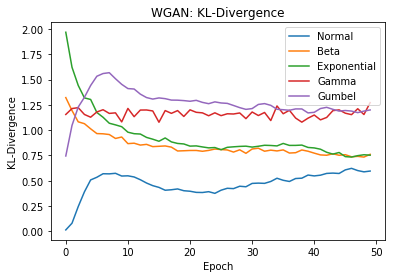

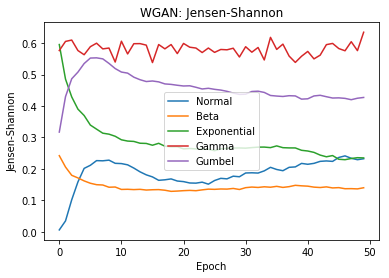

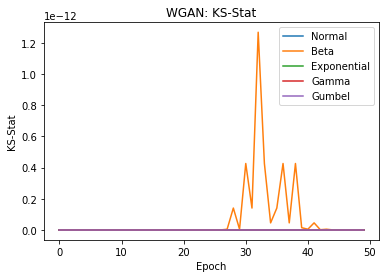

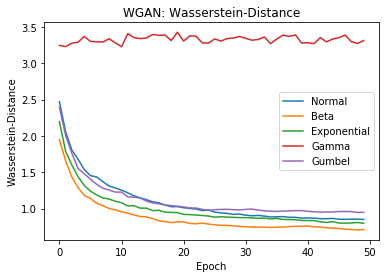

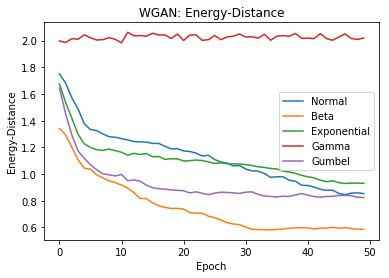

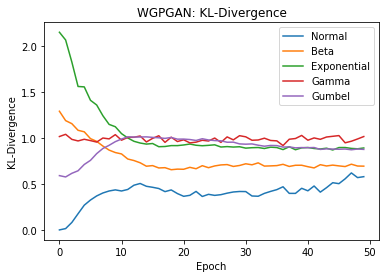

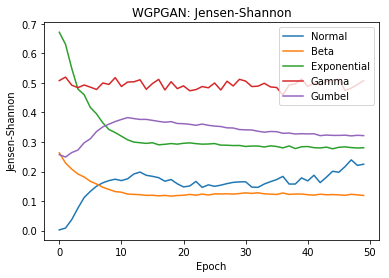

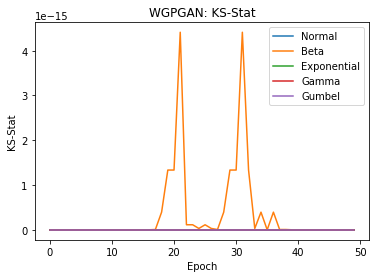

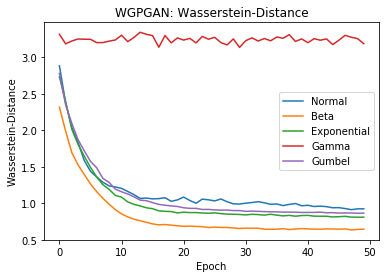

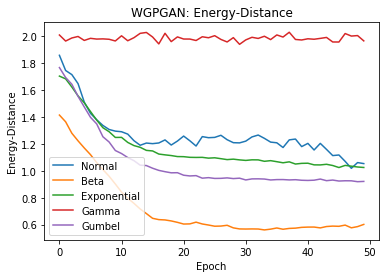

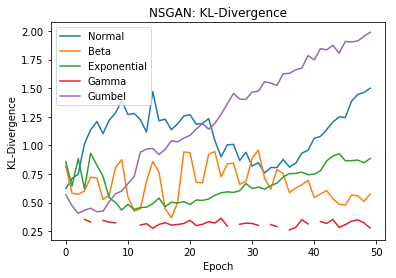

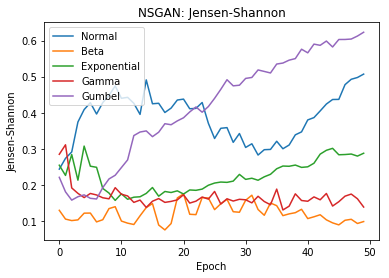

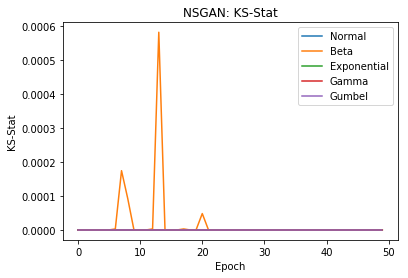

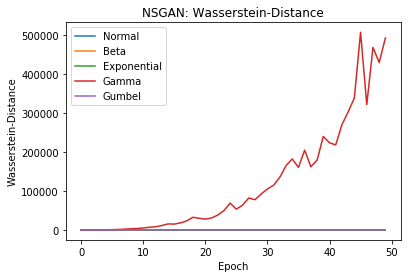

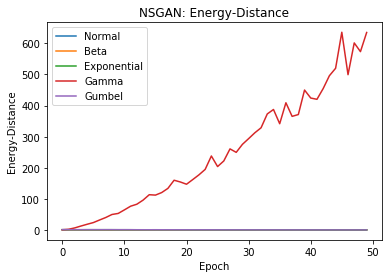

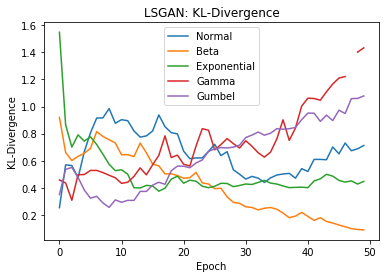

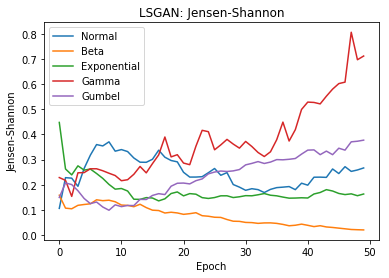

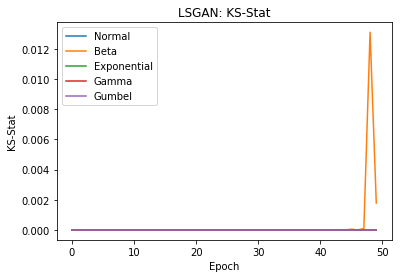

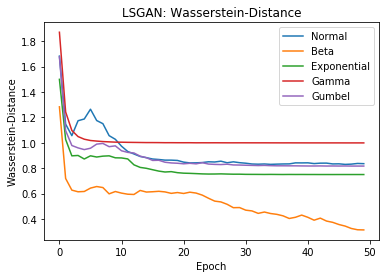

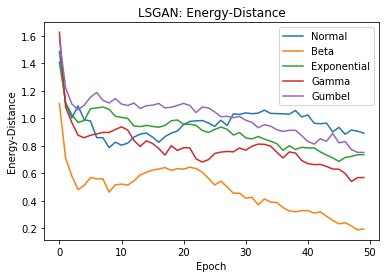

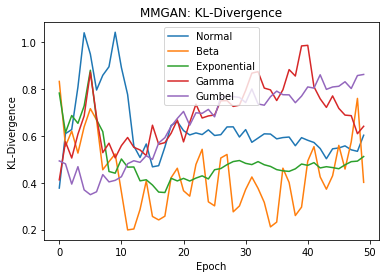

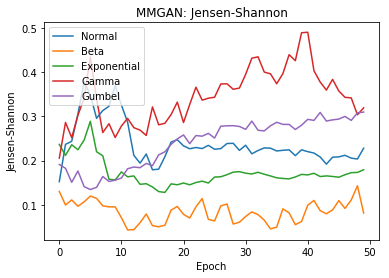

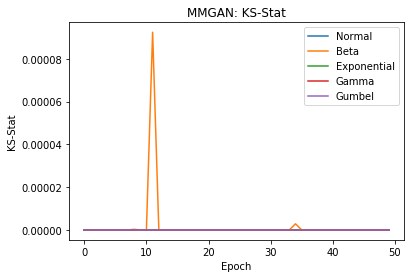

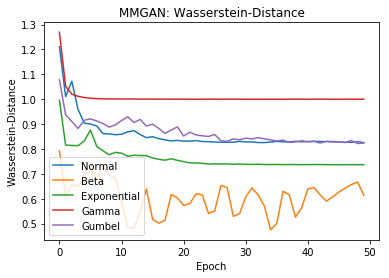

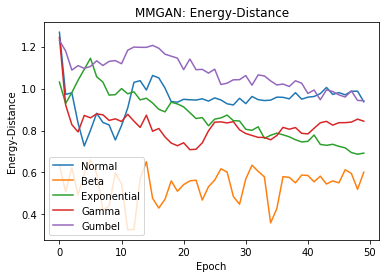

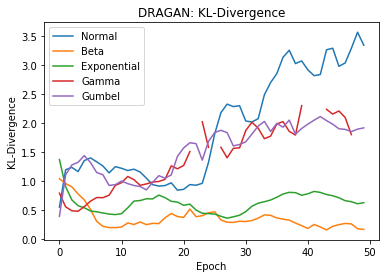

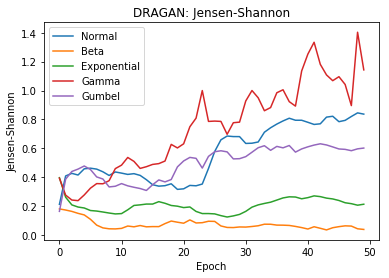

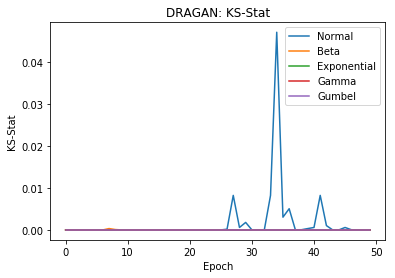

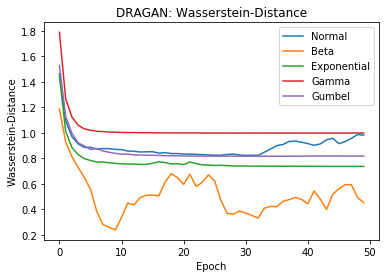

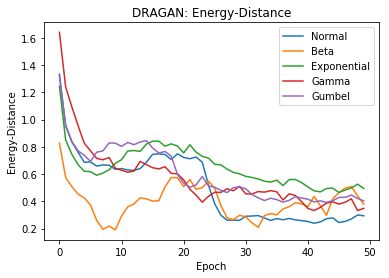

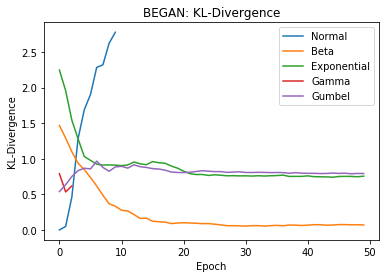

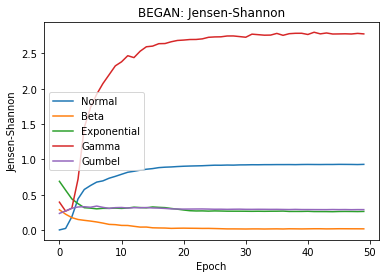

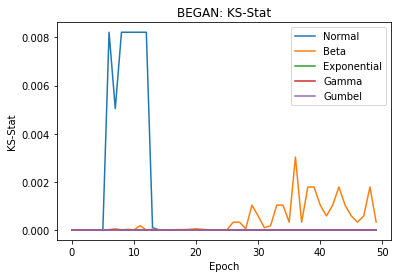

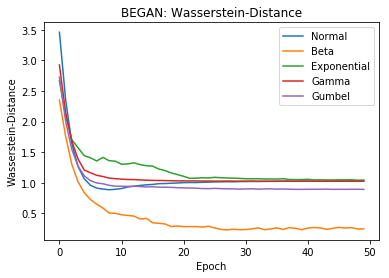

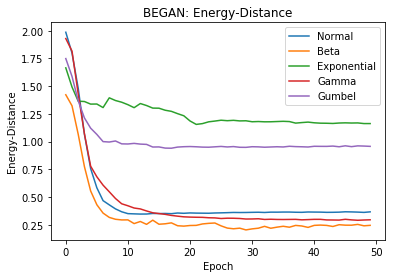

In [5]:
for gan in gans_index[:-1]:
    normal = pd.DataFrame(res[gan]['normal'])
    beta = pd.DataFrame(res[gan]['beta'])
    exponential = pd.DataFrame(res[gan]['exponential'])
    gamma = pd.DataFrame(res[gan]['gamma'])
    gumbel = pd.DataFrame(res[gan]['gumbel'])

    distance_metrics = ["KL-Divergence","Jensen-Shannon","KS-Stat","Wasserstein-Distance","Energy-Distance"]
    for dist in distance_metrics:
        plt.plot(range(epochs),normal[dist], label="Normal")
        plt.plot(range(epochs),beta[dist], label="Beta")
        plt.plot(range(epochs),exponential[dist], label="Exponential")
        plt.plot(range(epochs),gamma[dist], label="Gamma")
        plt.plot(range(epochs),gumbel[dist], label="Gumbel")
        plt.xlabel("Epoch")
        plt.ylabel(dist)
        plt.title("{0}: {1}".format(gan.upper(), dist))
        plt.legend()
        plt.show()


## 2. Empirical Analysis of Mode Collapse

#### Three methods to measure mode collapse Inception Score, MODE Score, Frechet Inception Distance

In [ ]:
# Here's where I'm not yet sure how to approach the problem. 

## 3. Empirical Evaluation of Performance with varying Information Geometry

In [ ]:
# Here we look over different degrees of complexity which we can define before. 

## 4. Evaluation of Empirical Sample Complexity

In [ ]:
# Here we're looking at number of samples. So, we just loop through samples!

## Here's all the GANs by themselves

# WGAN

In [ ]:
model = wgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 5e-5, D_lr = 5e-5, D_steps = 5, clip = 0.01)

# WGAN GP

In [ ]:
model = wgpgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128) 
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgpgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 5)

# VAE

In [ ]:
model = vae.VAE(image_size = size, hidden_dim = 400, z_dim = 20)
if torch.cuda.is_available():
    model.cuda()
trainer = vae.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model, num_epochs = n)

# # Explore latent space
# viz = vae.Viz(train_iter, val_iter, test_iter, model)
# viz.make_all()

# NS GAN

In [ ]:
model = nsgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = nsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, D_steps = 1)

# MM GAN

In [ ]:
model = mmgan.GAN(image_size = size, hidden_dim = 400, z_dim = 100)
if torch.cuda.is_available():
    model = model.cuda()
trainer = mmgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, G_init = 5, D_steps = 1)

# LS GAN

In [ ]:
model = lsgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = lsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# DRA GAN

In [ ]:
model = dragan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = dragan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# BE GAN

In [ ]:
model = began.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = began.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)